<a href="https://colab.research.google.com/github/Nikhilesh-075/6thSem-ML-Lab/blob/main/End_to_end_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000

longitude = np.random.uniform(-124, -113, n_samples)  # Longitude (West Coast of USA)
latitude = np.random.uniform(32, 42, n_samples)  # Latitude (West Coast of USA)

housing_median_age = np.random.randint(1, 52, n_samples)  # Housing median age (years)
total_rooms = np.random.randint(500, 5000, n_samples)  # Total rooms
total_bedrooms = np.random.randint(100, 1500, n_samples)  # Total bedrooms
population = np.random.randint(500, 10000, n_samples)  # Population of the area
households = np.random.randint(100, 3000, n_samples)  # Number of households

median_income = np.random.uniform(1, 15, n_samples)  # Median income (in $1000s)
median_house_value = (median_income * 50000 + total_rooms * 5 + population * 10 +
                      np.random.normal(0, 100000, n_samples))  # Median house value (target variable)

# Create a DataFrame
data = pd.DataFrame({
    'longitude': longitude,
    'latitude': latitude,
    'housing_median_age': housing_median_age,
    'total_rooms': total_rooms,
    'total_bedrooms': total_bedrooms,
    'population': population,
    'households': households,
    'median_income': median_income,
    'median_house_value': median_house_value
})

# Show the first few rows
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.880059,33.851329,28,4618,909,9004,279,9.822451,567269.650566
1,-113.542143,37.419009,7,4296,1473,5133,331,14.838867,781959.686903
2,-115.948067,40.729458,35,4488,1024,1420,2017,5.820312,345121.091388
3,-117.414757,39.322249,28,734,593,9769,442,1.864673,106765.589170
4,-122.283795,40.065611,14,1428,1221,7508,576,11.280900,501896.351062


         longitude     latitude  housing_median_age  total_rooms  \
count  1000.000000  1000.000000          1000.00000    1000.0000   
mean   -118.607178    37.070173            26.30200    2845.6210   
std       3.213511     2.921899            14.71684    1289.1591   
min    -123.949048    32.032183             1.00000     502.0000   
25%    -121.404294    34.410743            14.00000    1730.0000   
50%    -118.535119    37.187339            26.00000    3007.5000   
75%    -115.812485    39.604651            39.00000    3974.2500   
max    -113.003106    41.994137            51.00000    4998.0000   

       total_bedrooms   population   households  median_income  \
count     1000.000000  1000.000000  1000.000000    1000.000000   
mean       807.085000  5204.438000  1546.276000       7.960919   
std        407.798572  2754.379033   848.053116       4.026923   
min        103.000000   501.000000   104.000000       1.008785   
25%        462.750000  2811.250000   818.250000       4.5

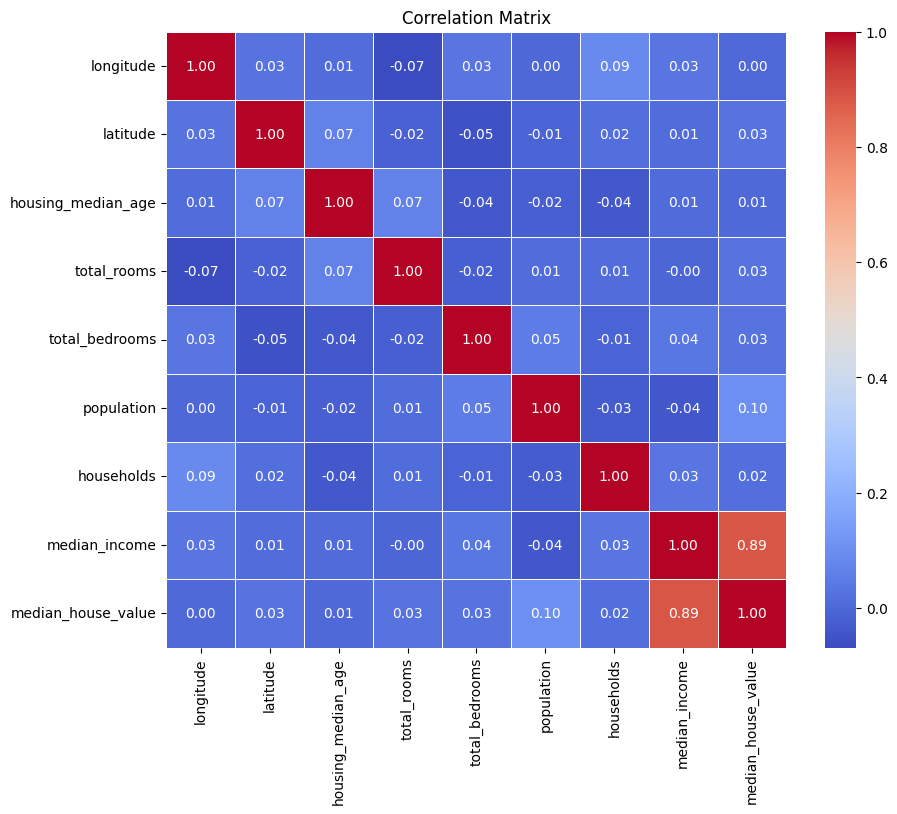

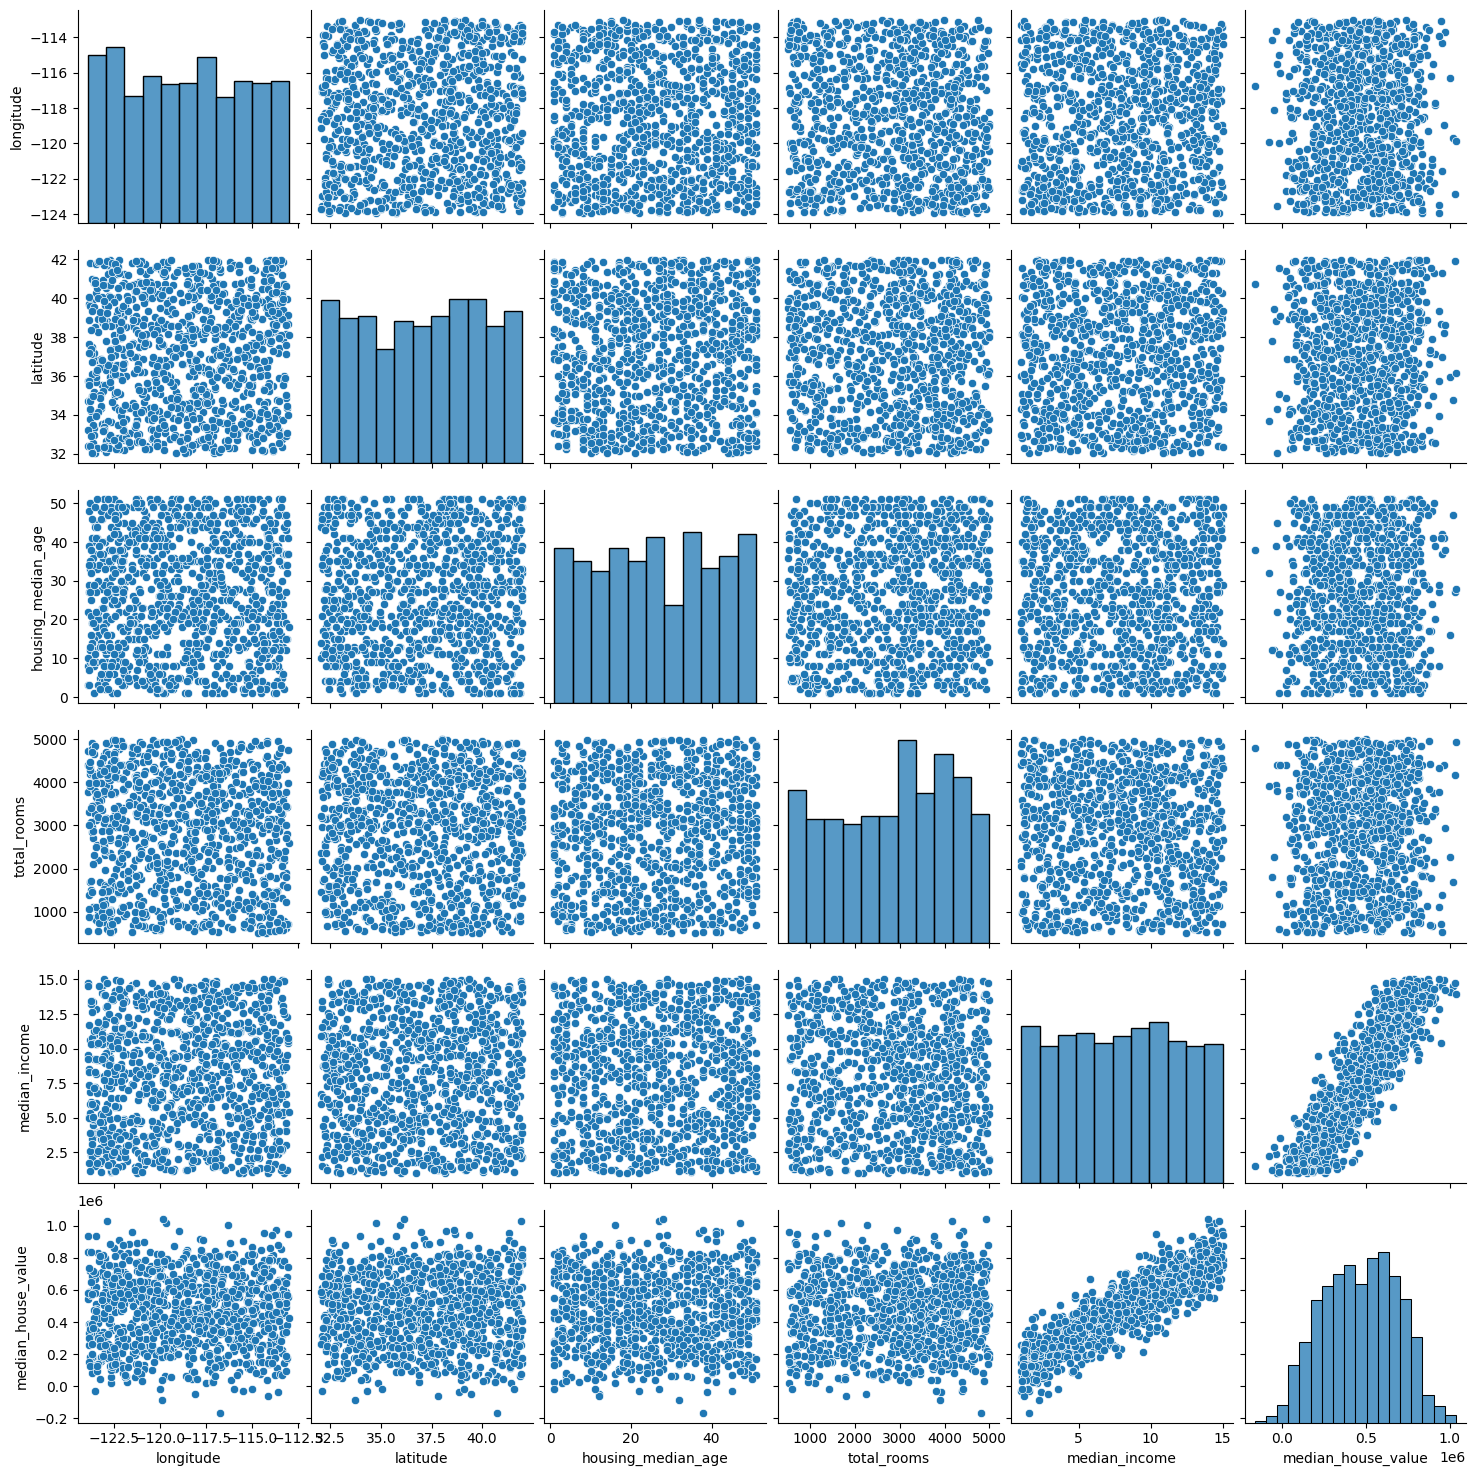

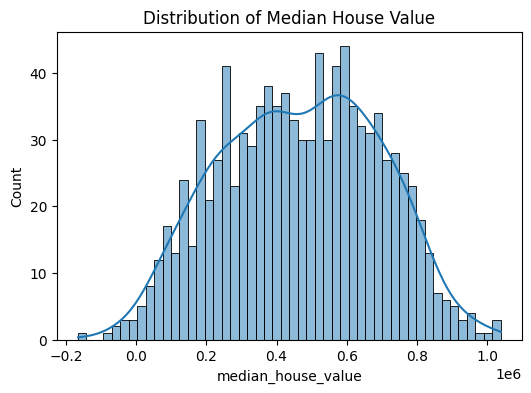

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the data
print(data.describe())

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Visualize relationships between features and target
sns.pairplot(data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'median_income', 'median_house_value']])
plt.show()

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Value')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check for missing values
print(data.isnull().sum())

# For simplicity, let's assume no missing values. If there were, we'd handle them here.

# Split the data into features (X) and target (y)
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 8647732466.36
R-squared: 0.81


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: -11523575941.687506
Random Forest Mean Squared Error: 10078979650.07
Random Forest R-squared: 0.78
